# 02 Data Exploration

Importing libraries.

In [1]:
import pandas as pd
import numpy as np

import yaml

import matplotlib.pyplot as plt
import seaborn as sns

Reading files.

In [2]:
try:
    with open('../params.yml','r') as file:
        config = yaml.safe_load(file)  
except Exception as e:
    print('Error reading the config file')

In [3]:
config

{'raw_data_1': '../01_data/PDB_31-07-2011.csv',
 'raw_data_2': '../01_data/PDB_31-12-2012.csv',
 'data': '../01_data/data.csv',
 'new_data': '../01_data/new_data.csv',
 'xy': '../01_data/xy.csv',
 'xy_06': '../01_data/xy_06.csv',
 'x_sum_np': '../01_data/x_sum_np.csv'}

In [4]:
data = pd.read_csv(config['data'])
data.head()

,pdb_id,seq,sst3,sst8
0,12asA,AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLS...,CHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCCEEECCCCCCCCCC...,CHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSCCTT...
1,16vpA,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,CCCCCCCCCCCHHHHHHHHHHHHCCCCHHHHHHHHHHCCCCCCCCC...,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...
2,1914A,MVLLESEQFLTELTRLFQKCRSSGSVFITLKKYDEGLEPAENKCLL...,CCEECHHHHHHHHHHHHHHCCCCCCEEEEEEEECCCCCCCCCEEEE...,CCEECHHHHHHHHHHHHHHTSSSCCEEEEEEEECCCCCCCCCEEEE...
3,1a0iA,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,CCCCCCCEEEEECCHHHHHHHHHHHCCEEEEECCCCEEEEEEEECC...,CTTCCCCEEEEECCHHHHHHHHHHHSSEEEEECCCSEEEEEEEETT...
4,1a0pA,QDLARIEQFLDALWLEKNLAENTLNAYRRDLSMMVEWLHHRGLTLA...,CHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHHHHHHHCCCCCC...,CHHHHHHHHHHHHHHTTCSCHHHHHHHHHHHHHHHHHHHHTSCCTT...


In [5]:
new_data = pd.read_csv(config['new_data'])
new_data.head()

,AA-2i,AA-i,AA,AA+i,AA+2,y3,y8
0,A,Y,I,A,K,H,H
1,Y,I,A,K,Q,H,H
2,I,A,K,Q,R,H,H
3,A,K,Q,R,Q,H,H
4,K,Q,R,Q,I,H,H


In [6]:
x = new_data.iloc[:,:5]
y3 = new_data['y3']
y8 = new_data['y8']
x.head()

,AA-2i,AA-i,AA,AA+i,AA+2
0,A,Y,I,A,K
1,Y,I,A,K,Q
2,I,A,K,Q,R
3,A,K,Q,R,Q
4,K,Q,R,Q,I


### Average length

In [7]:
data['length'] = [len(x) for x in data['seq']]
data

,pdb_id,seq,sst3,sst8,length
0,12asA,AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLS...,CHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCCEEECCCCCCCCCC...,CHHHHHHHHHHHHHHHHHHHHHHHCEEECCCCSEEETTSSCSCCTT...,327
1,16vpA,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,CCCCCCCCCCCHHHHHHHHHHHHCCCCHHHHHHHHHHCCCCCCCCC...,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,311
2,1914A,MVLLESEQFLTELTRLFQKCRSSGSVFITLKKYDEGLEPAENKCLL...,CCEECHHHHHHHHHHHHHHCCCCCCEEEEEEEECCCCCCCCCEEEE...,CCEECHHHHHHHHHHHHHHTSSSCCEEEEEEEECCCCCCCCCEEEE...,171
3,1a0iA,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,CCCCCCCEEEEECCHHHHHHHHHHHCCEEEEECCCCEEEEEEEECC...,CTTCCCCEEEEECCHHHHHHHHHHHSSEEEEECCCSEEEEEEEETT...,332
4,1a0pA,QDLARIEQFLDALWLEKNLAENTLNAYRRDLSMMVEWLHHRGLTLA...,CHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHHHHHHHCCCCCC...,CHHHHHHHHHHHHHHTTCSCHHHHHHHHHHHHHHHHHHHHTSCCTT...,271
...,...,...,...,...,...
21087,4hyoA,VPATRILLLVLAVIIYGTAGFHFIEGESWTVSLYWTFVTIATVGYG...,CCHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCCCCC...,CCHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHTTCCCC...,82
21088,4i4aA,XXNIIRKXDWDSXVHEYDLDGSRLLPWEGLNTPFGGAWCIVRPETK...,CCCCEECCCHHHCEEECCEEEEECCCCCCCCCCCEEEEEEECCCEE...,CCCSEECCCGGGCEEETTEEEEECCCCTTCCCSSEEEEEEECTTEE...,122
21089,4i62A,IEAIKSKGKLVVALNPDFAPFEYQKVVDGKNQIVGSDIELAKAIAT...,CHHHHHHCEEEEEECCCECCCEEEEEECCEEEEECHHHHHHHHHHH...,CHHHHHHTEEEEEECSCBTTTBEEEEETTEEEEESHHHHHHHHHHH...,237
21090,4i8eX,RAVTESAPNVEYHDVKGDMIQSVTTSFDDTSRLLTWTINLTPRQVK...,CCEEEECCEEEEECCCCCCEEEEEEEEECCCCEEEEEEEECCCCCC...,CCEEEECCEEEEECTTCCCEEEEEEEEETTTTEEEEEEEECCSCCC...,359


Text(0.5, 0, 'Protein Length')

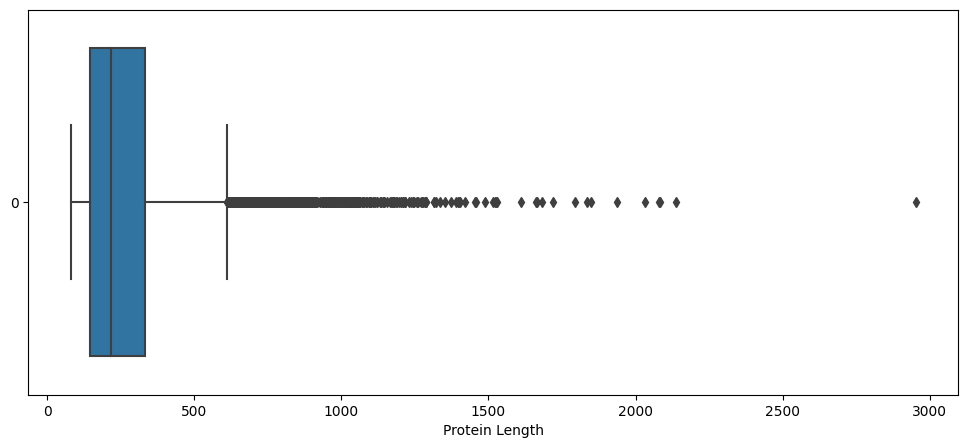

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(data = data['length'], orient='h', ax=ax)
ax.set_xlabel('Protein Length')

### Most common Aminoacid

Text(0.5, 0, 'Aminoacid')

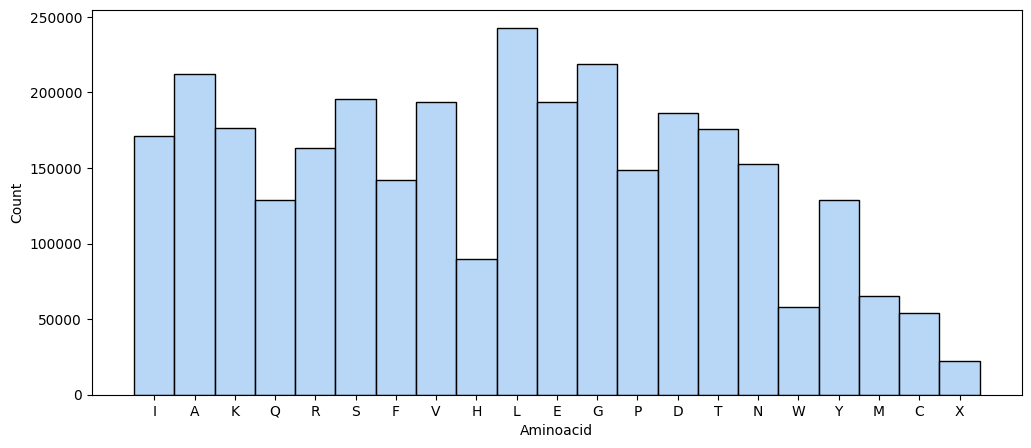

In [9]:
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data = new_data['AA'], ax = ax, color='#a1c9f4')
ax.set_xlabel('Aminoacid')

### Most common secondary structure

Text(0.5, 0, '8-categories Secondary Sequence')

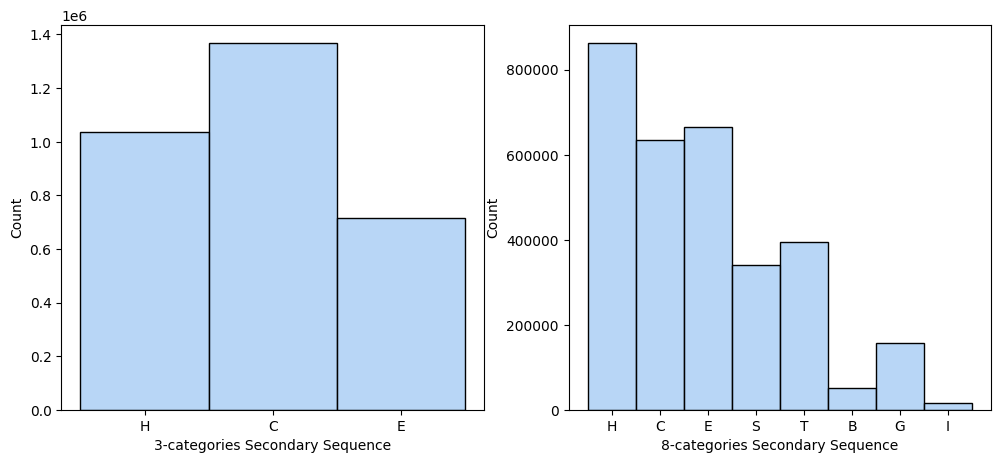

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data = new_data['y3'], ax = ax[0], color='#a1c9f4')
ax[0].set_xlabel('3-categories Secondary Sequence')
sns.histplot(data = new_data['y8'], ax = ax[1], color='#a1c9f4')
ax[1].set_xlabel('8-categories Secondary Sequence')

### Longest secondary structure

In [83]:
count=1
count_list=[]
length = 0
for index in range(0,len(data)):
    row = data['sst3'][index]
    
    for n in range(1,len(row)):
        if row[n] == row[n-1]:
            count +=1

        elif row[n] != row[n-1]:
            count = 1
        
        count_list.append(count)

    max_count = max(count_list)
    
    if max_count > length:
        length = max_count
        protein = data['pdb_id'][index]
print('Longest sequence has {} AA, and the protein is {}'.format(length, protein))

Longest sequence has 175 AA, and the protein is 1n7dA


### PCA

In [30]:
xy = pd.read_csv(config['xy'])
xy.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,y3,y8
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,H,H
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,H,H
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,H,H
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,H,H
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,H,H


In [ ]:
x_enc = xy.iloc[:,0:21]
x_enc.head(1)

In [24]:
y_enc

0        H
1        H
2        H
3        H
4        H
        ..
59530    C
59531    H
59532    H
59533    C
59534    C
Name: y3, Length: 59535, dtype: object

In [25]:
y_enc = xy.iloc[:,21]
y_color = [0 if x=='H' else (1 if x=='C' else 2) for x in y_enc]

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_new = pca.fit_transform(x_enc)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08068817 0.07561081 0.07299522]
[154.27993988 149.34699033 146.74108814]


Text(0.5, 0, 'Z Label')

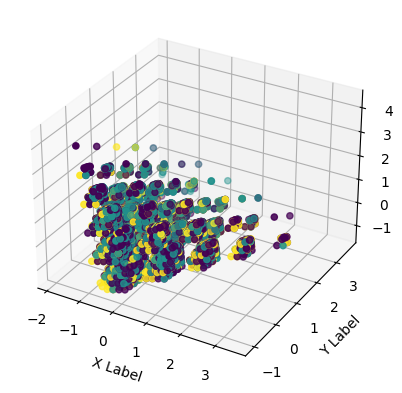

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x_new[:, 0], x_new[:, 1], x_new[:, 2], c=y_color)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

### Components of PCA

<Axes: >

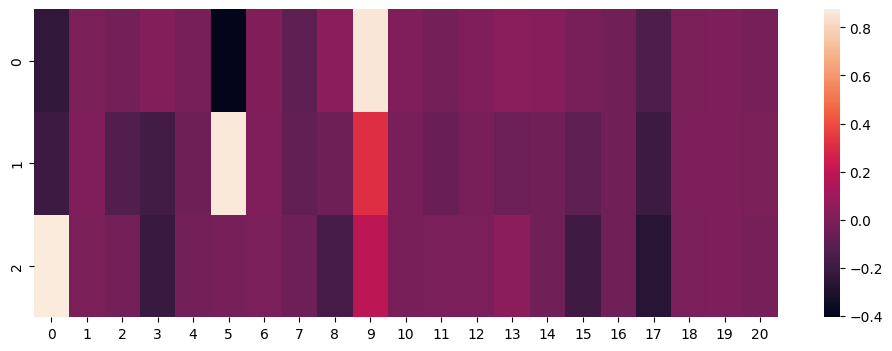

In [34]:
df_comp = pd.DataFrame(pca.components_, columns = x_enc.columns)

fig, ax = plt.subplots(figsize=(12,4))
  
sns.heatmap(df_comp, ax=ax)

### Correlation

In [31]:
xy_enc = xy.copy()

In [32]:
xy_enc['y3'] = [0 if x=='H' else (1 if x=='C' else 2) for x in xy['y3']]

C:\Users\joana\AppData\Local\Temp\ipykernel_13960\3443468378.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  xy_corr = xy_enc.corr()


<Axes: >

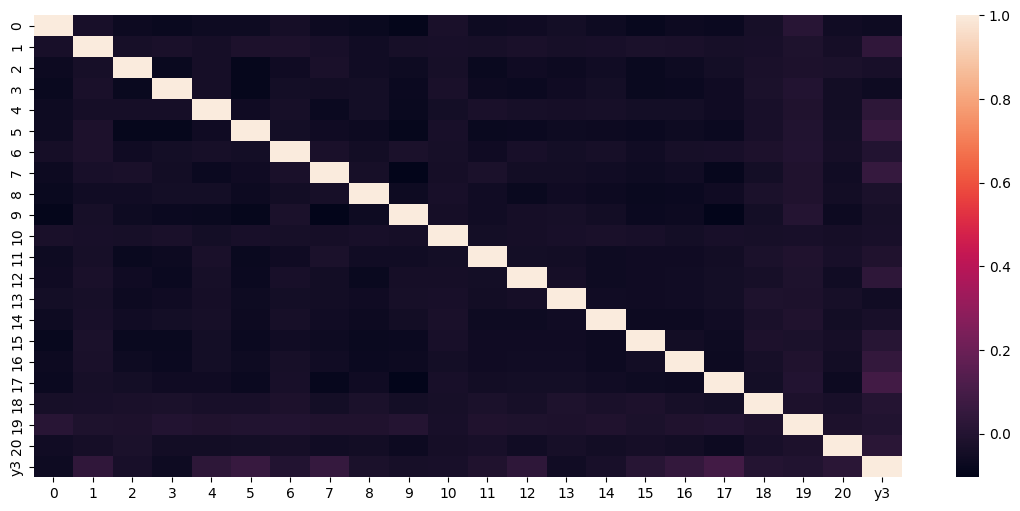

In [33]:
xy_corr = xy_enc.corr()

plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(xy_corr)

Apparently, correlation is not great.